# Prédiction du coût des assurances médicales

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LinearRegression
import joblib

### Chargement et préparaiton des données 

In [2]:
data = pd.read_csv('medical_insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Dimensions du DataFrame
data.shape

(2772, 7)

In [4]:
# Informations générales 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [5]:
# Est-ce qu'il y'a des valeurs manquantes ?
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

###  Analyse exploratoire (EDA)

<Axes: xlabel='charges', ylabel='Count'>

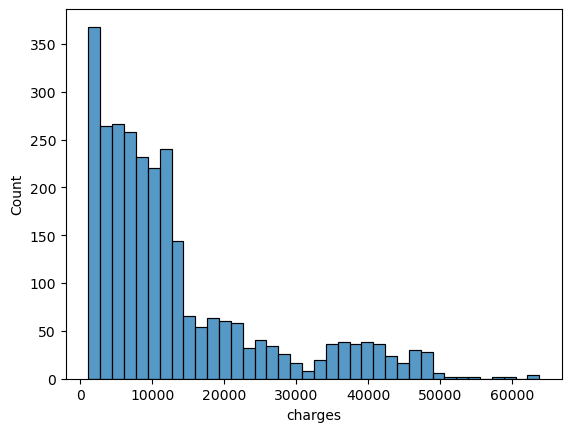

In [6]:
# Distribution de la variable cible
sns.histplot(data['charges'])

**Analyse entre chaque variable**

<Axes: xlabel='charges', ylabel='age'>

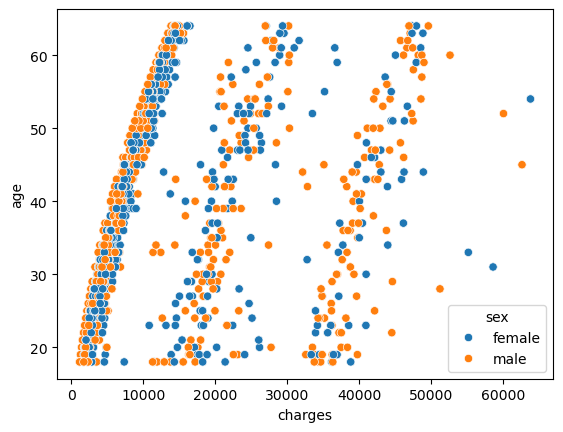

In [7]:
# 1. age 
sns.scatterplot(y = data['age'], x=data['charges'],hue='sex', data=data)

<Axes: xlabel='charges', ylabel='bmi'>

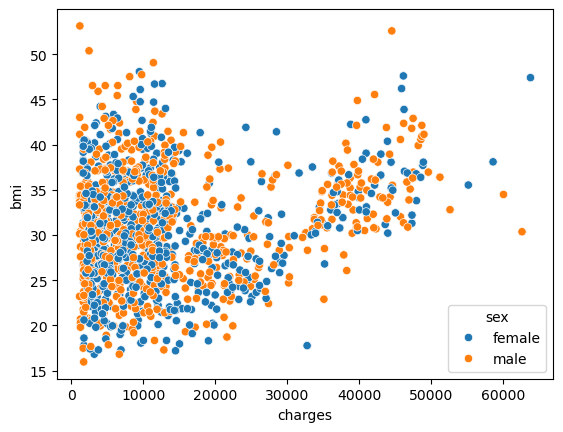

In [8]:
# 2. bmi
sns.scatterplot(x=data['charges'], y = data['bmi'], data=data, hue='sex')

<Axes: xlabel='charges', ylabel='children'>

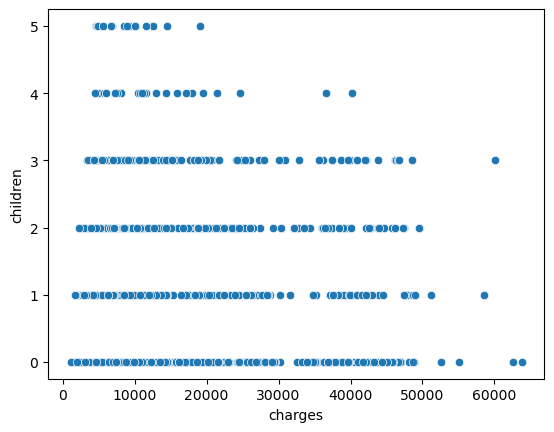

In [9]:
# 3. children
sns.scatterplot(x=data['charges'], y=data['children'], data=data)

<Axes: xlabel='None', ylabel='charges'>

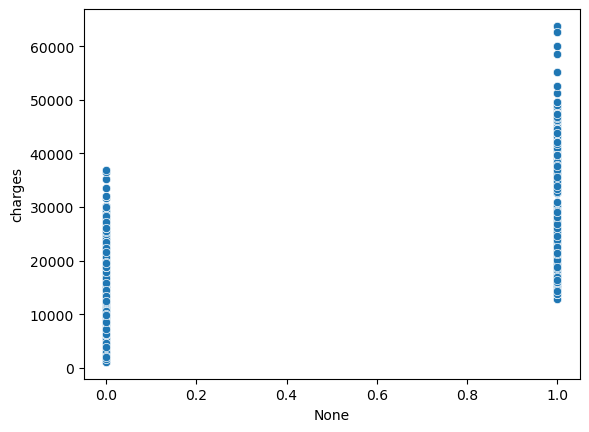

In [10]:
# 4. smoker
smoker = data['smoker'].astype('category').cat.codes
sns.scatterplot(y=data['charges'], x=smoker, data=data)

In [11]:
data['region'].astype('category')

0       southwest
1       southeast
2       southeast
3       northwest
4       northwest
          ...    
2767    southeast
2768    southwest
2769    northwest
2770    northwest
2771    southwest
Name: region, Length: 2772, dtype: category
Categories (4, object): ['northeast', 'northwest', 'southeast', 'southwest']

<Axes: xlabel='charges', ylabel='None'>

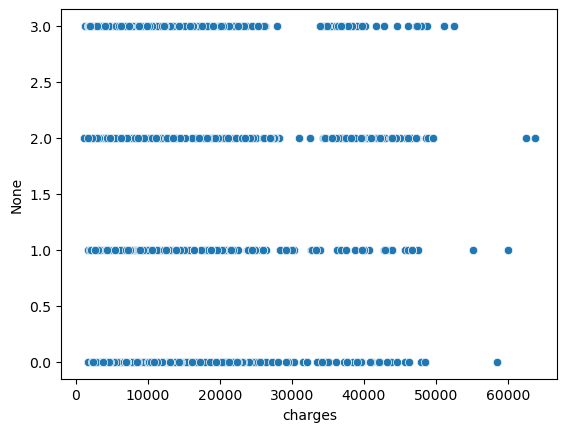

In [12]:
# 5. region
region = data['region'].astype('category').cat.codes
sns.scatterplot(x = data['charges'], y = region, data=data)

<Axes: xlabel='charges', ylabel='None'>

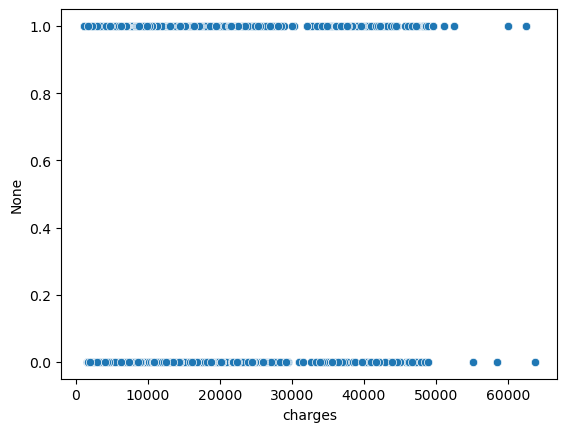

In [13]:
# 6. sex
sex = data['sex'].astype('category').cat.codes
sns.scatterplot(x= data['charges'], y=sex, data=data)

In [14]:
# Matrice de corrélation des valeurs numérique 
data_num = data[['age', 'bmi',	'children',	'charges']]
corr = data_num.corr()
corr

,age,bmi,children,charges
age,1.000000,0.113048,0.037574,0.298624
bmi,0.113048,1.000000,-0.001492,0.199846
children,0.037574,-0.001492,1.000000,0.066442
charges,0.298624,0.199846,0.066442,1.000000


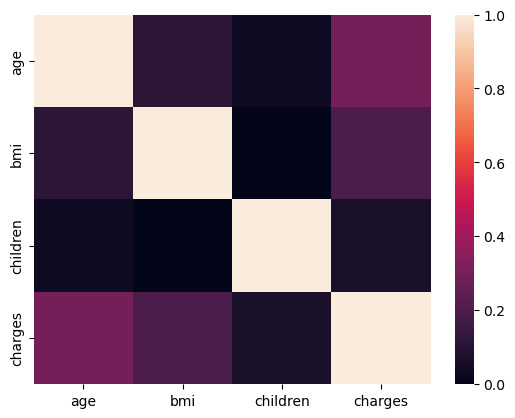

In [15]:
sns.heatmap(corr)
plt.show()

### Un constat 
Nous remarquons que les valeurs numériques n'influent pas vraiment sur "charges"

### Prétraitement 

In [16]:
# Encodage des variables catégorielles
data['sex'] = sex
data['smoker'] = smoker
data['region'] = region
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [17]:
# Séparer les données 
from sklearn.model_selection import train_test_split
x = data.drop(['charges'], axis=1)
y = data['charges']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [18]:
# Normalisation des données 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaler = scaler.fit_transform(x_train)
x_test_scaler = scaler.transform(x_test)

### Régression linéaire

In [19]:
# Entraîner un modèle linéaire
lin_model = LinearRegression()
lin_model.fit(x_train_scaler, y_train)

LinearRegression()

In [20]:
# Evaluation des métriques de performances
from sklearn.metrics import r2_score, mean_squared_error
# 1. Données d'entraînement
train_lin_pred = lin_model.predict(x_train_scaler)
R_2_train = round(r2_score(y_train, train_lin_pred),2)
RMSE_train = round(np.sqrt(mean_squared_error(y_train, train_lin_pred)), 2)
print(" Métriques de performances sur les données d'entraînements")
print(f" R2 = {R_2_train}")
print(f" RMSE = {RMSE_train}")

 Métriques de performances sur les données d'entraînements
 R2 = 0.75
 RMSE = 6091.91


In [21]:
# 2. Données de test
test_lin_pred = lin_model.predict(x_test_scaler)
R_2_test = round(r2_score(y_test, test_lin_pred), 2)
RMSE_test = round(np.sqrt(mean_squared_error(y_test, test_lin_pred)), 2)
print(" Métriques de perforamces sur les données de tests")
print(f" R2 = {R_2_test}")
print(f" RMSE = {RMSE_test}")

 Métriques de perforamces sur les données de tests
 R2 = 0.74
 RMSE = 5972.24


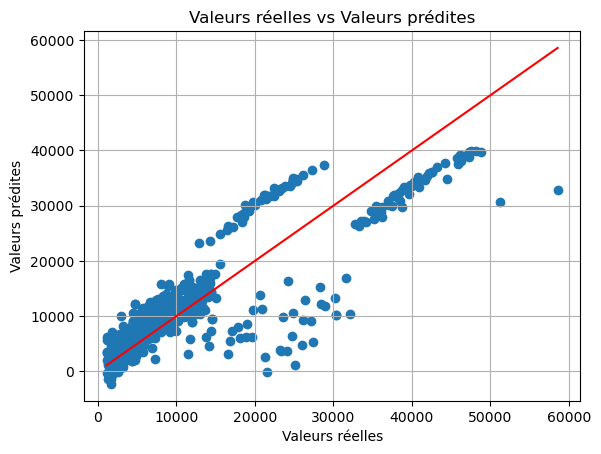

In [22]:
# Visualisation sur les valeurs réelles vs les valeurs prédites
y_pred = lin_model.predict(x_test_scaler)
plt.scatter(y_test, y_pred, label='predict')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], label='réelle', c='r')
plt.title('Valeurs réelles vs Valeurs prédites')
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.grid(True)
plt.show()

In [23]:
# Interprétation des coéfficients du modèle 
lin_model.coef_

array([3734.74648219,   64.80709273, 2023.20513973,  603.90543597,
       9696.00216839, -360.01746254])

La variable qui influence le plus le modèle est la **région**

### Régression polynomiale 

In [24]:
# Création de la pipeline en testant plusieurs degrés
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
poly_model = Pipeline([
    ("poly_features", PolynomialFeatures(degree=2)),
    ("lin_model", LinearRegression())
])
poly_model.fit(x_train_scaler, y_train)
joblib.dump(poly_model, 'model_med.pkl')
# Metrique de performances du modèle pour des degrées de 2, 3, 4
def performance(data_1, data_2):
    for k in range(2, 5):
        poly_model = Pipeline([
            ("poly_features", PolynomialFeatures(degree=k)),
            ("lin_model", LinearRegression())
        ])
        poly_model.fit(data_1, data_2)
        poly_pred_train = poly_model.predict(data_1)
        R_2_pol = round(r2_score(data_2, poly_pred_train), 2)
        RMSE_pol = round(np.sqrt(mean_squared_error(data_2, poly_pred_train)), 2)
        print(f" Métrique de performances pour le {k}ième degré")
        print(f" RMSE = {RMSE_pol}")
        print(f" R2 = {R_2_pol}")

In [25]:
# 1. Données d'entraînements
print(" **Données d'entrainement** ")
performance(x_train_scaler, y_train)

 **Données d'entrainement** 
 Métrique de performances pour le 2ième degré
 RMSE = 4752.63
 R2 = 0.85
 Métrique de performances pour le 3ième degré
 RMSE = 4617.72
 R2 = 0.86
 Métrique de performances pour le 4ième degré
 RMSE = 4427.04
 R2 = 0.87


In [26]:
# 2. Données de test
print(" **Données de test** ")
performance(x_test_scaler, y_test)

 **Données de test** 
 Métrique de performances pour le 2ième degré
 RMSE = 4717.37
 R2 = 0.84
 Métrique de performances pour le 3ième degré
 RMSE = 4477.34
 R2 = 0.86
 Métrique de performances pour le 4ième degré
 RMSE = 4041.27
 R2 = 0.88


### Distribution des prédictions

<Axes: ylabel='Count'>

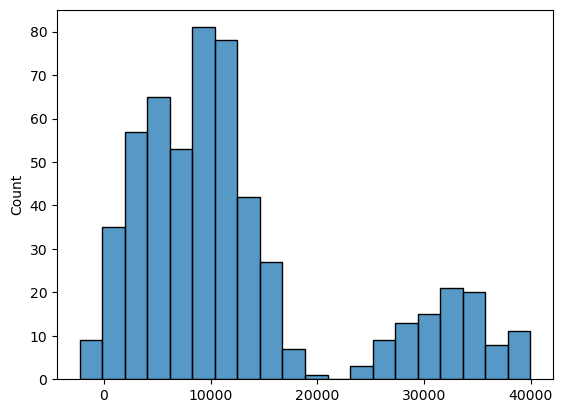

In [27]:
# 1. Modèle linéaire 
sns.histplot(test_lin_pred)

In [28]:
#2. Modèle polynomiale 
def visualisation(k, x = x_test_scaler, y = y_test):
    poly_model = Pipeline([
            ("poly_features", PolynomialFeatures(degree=k)),
            ("lin_model", LinearRegression())
        ])
    poly_model.fit(x_test_scaler, y_test)
    poly_pred_test = poly_model.predict(x_test_scaler)
    return sns.histplot(poly_pred_test)

<Axes: ylabel='Count'>

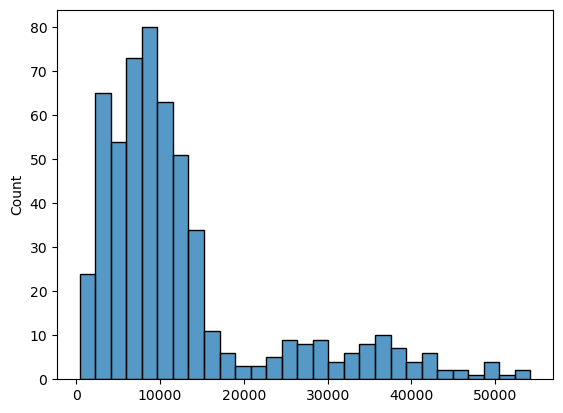

In [29]:
# Degré 2
visualisation(k=2)

<Axes: ylabel='Count'>

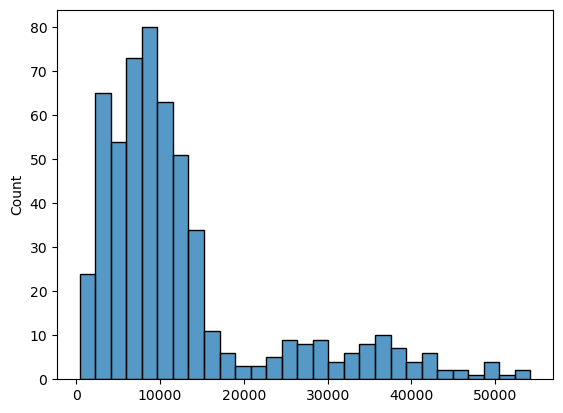

In [30]:
# Degré 3
visualisation(k=2)

<Axes: ylabel='Count'>

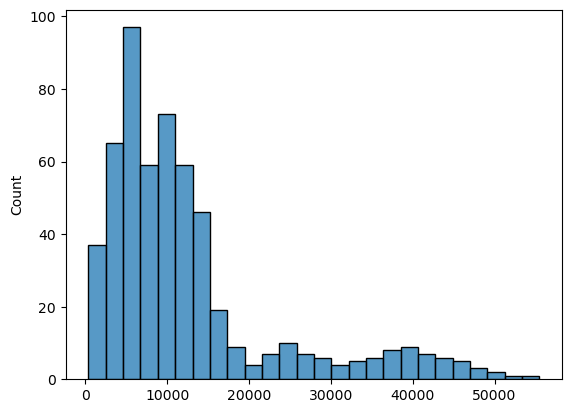

In [31]:
visualisation(k=4)

### Cross-validation

In [32]:
from sklearn.model_selection import cross_val_score
def validation(model, n=5):
    print(f"Pour ce modèle '{model}', après cross-validation nous avons : ")
    moy = cross_val_score(model, x_test_scaler, y_test, cv=n).mean()
    var = cross_val_score(model, x_test_scaler, y_test, cv=n).var()
    print(f" La moyenne : {round(moy, 3)}")
    print(f" La variance : {round(var, 3)}")

In [33]:
# Modèle de regression linéaire 
validation(lin_model)

Pour ce modèle 'LinearRegression()', après cross-validation nous avons : 
 La moyenne : 0.713
 La variance : 0.008


In [34]:
# Modèle de regression polynomiale degré 2
poly_model = Pipeline([
        ("poly_features", PolynomialFeatures(degree=2)),
        ("lin_model", LinearRegression())
])
validation(poly_model)

Pour ce modèle 'Pipeline(steps=[('poly_features', PolynomialFeatures()),
                ('lin_model', LinearRegression())])', après cross-validation nous avons : 
 La moyenne : 0.807
 La variance : 0.004


In [37]:
# Degré 3
poly_model = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("lin_model", LinearRegression())])
validation(poly_model)

Pour ce modèle 'Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('lin_model', LinearRegression())])', après cross-validation nous avons : 
 La moyenne : 0.776
 La variance : 0.006


In [38]:
# Degré 4
poly_model = Pipeline([
        ("poly_features", PolynomialFeatures(degree=4)),
        ("lin_model", LinearRegression())])
validation(poly_model)

Pour ce modèle 'Pipeline(steps=[('poly_features', PolynomialFeatures(degree=4)),
                ('lin_model', LinearRegression())])', après cross-validation nous avons : 
 La moyenne : 0.049
 La variance : 0.301


# Prédiction

In [39]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [40]:
def information():
    print("Veuillez répondre par des valeurs numériques")
    age = int(input("Entrez votre âge : "))
    sex = int(input("Entrez votre sexe femme = 0, homme = 1 : "))
    bmi = float(input("Quel est votre bmi ? "))
    children = int(input("Entrez votre nombre d'enfants : "))
    smoker  = int(input("Fumez-vous ? OUI = 1, NON = 0 : "))
    region  = int(input("De quel region venez-vous ?\nnortheast : 0\nnorthwest : 1\nsoutheast : 2\nsouthwest: 3 "))
    df = pd.DataFrame({
    "age": [age], 
    "sex": [sex],
    "bmi": [bmi],
    "children": [children], 
    "smoker" : [smoker],
    "region" : [region]
    })
    df_scaler = scaler.transform(df)
    poly_model_new = joblib.load('model_med.pkl')
    print("Vous paierais : ")
    print("Modèle lineaire : ")
    print(lin_model.predict(df_scaler))
    print("Modèle polynomiale de degré 2: ")
    print(poly_model_new.predict(df_scaler))

In [41]:
information()

Veuillez répondre par des valeurs numériques


Entrez votre âge :  18
Entrez votre sexe femme = 0, homme = 1 :  0
Quel est votre bmi ?  28.092
Entrez votre nombre d'enfants :  2
Fumez-vous ? OUI = 1, NON = 0 :  1
De quel region venez-vous ?
northeast : 0
northwest : 1
southeast : 2
southwest: 3  3


Vous paierais : 
Modèle lineaire : 
[25696.25903644]
Modèle polynomiale de degré 2: 
[24529.49140228]


In [42]:
information()

Veuillez répondre par des valeurs numériques


Entrez votre âge :  23
Entrez votre sexe femme = 0, homme = 1 :  1
Quel est votre bmi ?  20.082
Entrez votre nombre d'enfants :  0
Fumez-vous ? OUI = 1, NON = 0 :  0
De quel region venez-vous ?
northeast : 0
northwest : 1
southeast : 2
southwest: 3  0


Vous paierais : 
Modèle lineaire : 
[641.689793]
Modèle polynomiale de degré 2: 
[3097.22863959]


In [43]:
information()

Veuillez répondre par des valeurs numériques


Entrez votre âge :  17
Entrez votre sexe femme = 0, homme = 1 :  0
Quel est votre bmi ?  23
Entrez votre nombre d'enfants :  7
Fumez-vous ? OUI = 1, NON = 0 :  1
De quel region venez-vous ?
northeast : 0
northwest : 1
southeast : 2
southwest: 3  1


Vous paierais : 
Modèle lineaire : 
[26883.82821978]
Modèle polynomiale de degré 2: 
[17580.12511813]


###  Constat
- Nous constatons que le modèle polynomiale donne de meilleures prédictions que le modèle linéaire car il ne nous donne pas de valeurs négatives dans certains cas contrairement au modèle linéaire